## Setting up the custom dataset (Dash)

In [ ]:
# Install SNNTorch package
!pip install snntorch

# Import necessary libraries
import snntorch as snn
import torch
from torch.utils.data import DataLoader
from torchvision import transforms

# Training Parameters
batch_size = 128  # Batch size for training
num_classes = 1   # Number of classes (in this case, 1 for dash)

# Define custom dash image creation function
def create_dash_image(size):
    """Creates a tensor representing a horizontal line image."""
    # Create an empty square tensor (a multi-dimensional array) called image filled with zeros (pixel value)
    image = torch.zeros(size, size)
    # Draw a horizontal dash in the middle of the image
    image[size // 2, :] = 1.0  # Set entire row to 1.0
    return image.unsqueeze(0).unsqueeze(0)  # Add batch and channel dimensions (2D to a 4D shape)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

## Visualization of Rate coding

Rate-coded dash shape: torch.Size([100, 1, 1, 1, 28, 28])


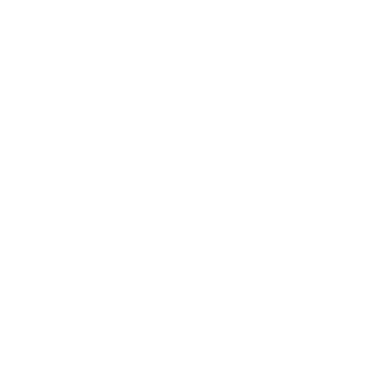

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from snntorch import spikegen, spikeplot as splt
from IPython.display import HTML  # Import for Jupyter Notebook
import torch  # Assuming you're already using torch

# Custom Dash Dataset with target label and comments
class CustomDashDataset(torch.utils.data.Dataset):
    def __init__(self, size):
        """Initialize the CustomDashDataset."""
        self.size = size
        self.data = create_dash_image(size)  # Assuming create_dash_image function exists

    def __len__(self):
        """Return the length of the dataset."""
        return 1  # We only have one image

    def __getitem__(self, idx):
        """Get an item from the dataset."""
        return self.data.clone()  # Return data

# Temporal Dynamics
num_steps = 100  # Adjust as needed

# Fetch data and target from the custom dataset
custom_dataset = CustomDashDataset(size=28)
dash_image = custom_dataset[0]  # Get the first image

# Rate coding for the dash image
rate_coded_dash = spikegen.rate(dash_image.unsqueeze(1), num_steps=num_steps)
print(f"Rate-coded dash shape: {rate_coded_dash.size()}")

# Reshape to combine timestep and channel dimensions (assuming single channel)
rate_coded_dash_reshaped = rate_coded_dash.reshape(num_steps, 28, 28)

# Visualization
fig, ax = plt.subplots()
anim = splt.animator(rate_coded_dash_reshaped, fig, ax, num_steps=num_steps)

HTML(anim.to_html5_video())  # Use the animation after creation

## RASTER PLOTS

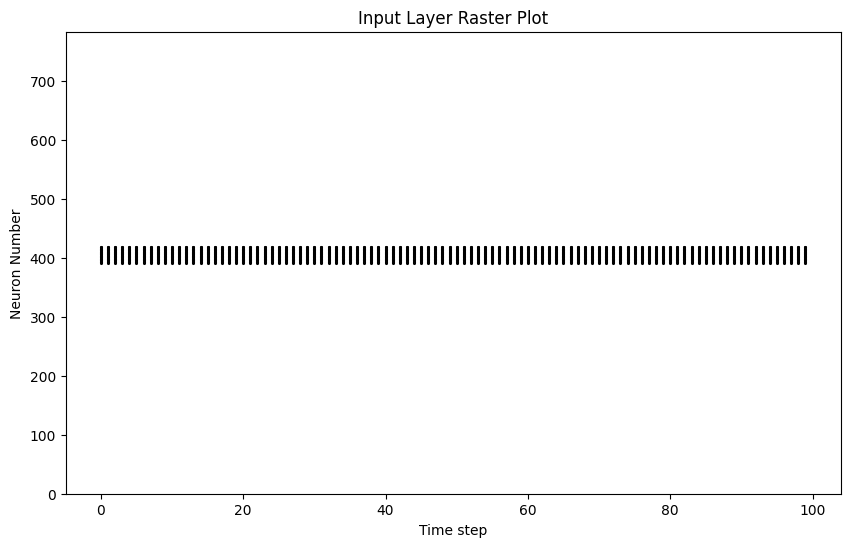

In [ ]:
# Reshape for raster plot and comments
reshaped_spikes = rate_coded_dash.reshape((num_steps, -1))
# Reshape the rate-coded dash tensor for visualization. The "-1" automatically calculates the appropriate size for the second dimension, combining all other dimensions.

# Raster plot for the entire input layer and comments
fig = plt.figure(facecolor="w", figsize=(10, 6))
ax = fig.add_subplot(111)
splt.raster(reshaped_spikes, ax, s=1.5, c="black")
# Create a raster plot to visualize spike activity over time. Each row represents a neuron, and each column represents a time step.

plt.ylim(0, 784)
plt.title("Input Layer Raster Plot")
plt.xlabel("Time step")
plt.ylabel("Neuron Number")
plt.show()
# Set plot title and axis labels, and display the raster plot.